# Identifying the Problem

Clearly define the specific question or problem related to the impact of mobile phones on students' health.

# Data Understanding

# Data Collection
First, load the data from your CSV file.

In [ ]:
# Step 2: Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset from your Google Colab environment
file_path = '/content/Structure1.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataset
print("Initial Dataset Overview:")
print(df.info())  # Shows data types and missing values
print(df.describe())  # Summary statistics
print(df.head())  # Display the first few rows

Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     420 non-null    float64
 1   Country                  420 non-null    object 
 2   Fish_Type                420 non-null    object 
 3   Quantity                 354 non-null    object 
 4   Value                    353 non-null    object 
 5   Exchange_Rate (Average)  367 non-null    object 
 6   Price_per_Unit           353 non-null    float64
 7   Season                   362 non-null    float64
 8   Unnamed: 8               0 non-null      float64
 9   Unnamed: 9               0 non-null      float64
dtypes: float64(5), object(5)
memory usage: 34.2+ KB
None
              Year  Price_per_Unit  Season  Unnamed: 8  Unnamed: 9
count   420.000000      353.000000   362.0         0.0         0.0
mean   2021.500000        4.2

# Data Exploration
Explore the structure and types of data in the dataset.

Dataset Shape: (436, 10)
Data Types:
 Year                       float64
Country                     object
Fish_Type                   object
Quantity                    object
Value                       object
Exchange_Rate (Average)     object
Price_per_Unit             float64
Season                     float64
Unnamed: 8                 float64
Unnamed: 9                 float64
dtype: object

Basic Statistics Summary:
               Year        Country             Fish_Type Quantity       Value  \
count    420.000000            420                   420      354         353   
unique          NaN             10                     7      351         351   
top             NaN  United States  Edible fish products    54ÿKg  20,982,385   
freq            NaN             42                    60        3           2   
mean    2021.500000            NaN                   NaN      NaN         NaN   
std        1.709862            NaN                   NaN      NaN         NaN   
min 

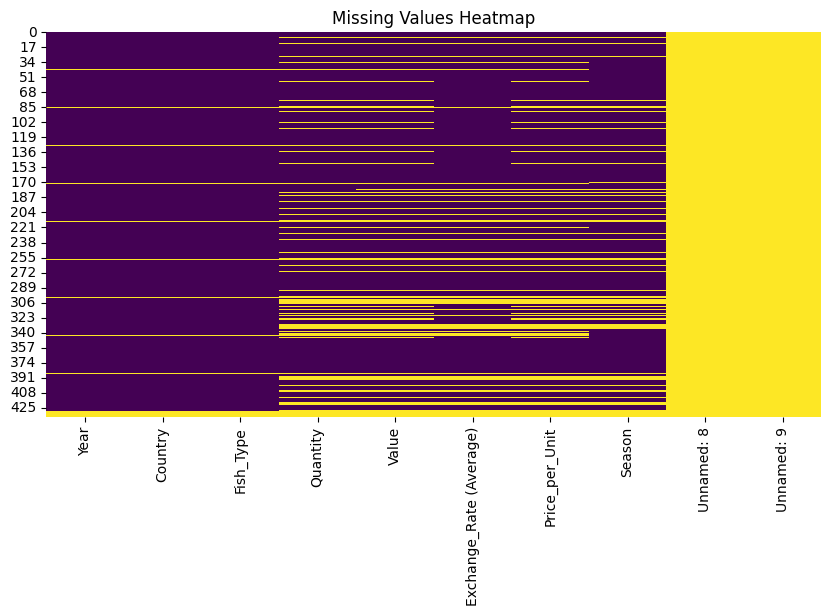

In [ ]:
# Check the shape and types of data
print("Dataset Shape:", df.shape)
print("Data Types:\n", df.dtypes)

# Get basic summarization statistics
print("\nBasic Statistics Summary:")
print(df.describe(include='all'))

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Data Preprocessing

Cleaning
Remove inconsistencies or errors, handle missing values, and remove duplicates.

In [16]:
# Step 3: Data Cleaning

# Impute missing values (using the most frequent strategy)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
# The issue is likely due to SimpleImputer dropping columns with all missing values.

missing_cols = df.columns[df.isnull().all()]
print(f"Columns with all missing values: {missing_cols}")
# If missing_cols is not empty, consider imputing/dropping/handling them separately

# Impute the remaining columns
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=missing_cols)),
                          columns=df.drop(columns=missing_cols).columns)

# Check for duplicate records
duplicates = df_imputed.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")

# Remove duplicates
df_imputed = df_imputed.drop_duplicates()

Columns with all missing values: Index(['Unnamed: 8', 'Unnamed: 9'], dtype='object')

Number of duplicate records: 15


Transforming Categorical Variables
Convert categorical variables to numerical representations.

In [17]:
# Step 4: Convert Categorical to Numerical
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])
    label_encoders[column] = le

print("Categorical columns converted to numerical.")


Categorical columns converted to numerical.


Handle missing values (mean, median, mode).

Reduction
Dimensionality reduction or attribute subset selection can be implemented using techniques like PCA.

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Use df_imputed instead of df to ensure
Price_per_Unit_data = df_imputed[['Price_per_Unit']]

# Handle NaN values before scaling and PCA
# Using SimpleImputer to replace NaNs with the mean
imputer = SimpleImputer(strategy='mean')
Price_per_Unit_data = imputer.fit_transform(Price_per_Unit_data)

# Scale the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Price_per_Unit_data)

pca = PCA(n_components=1)
reduced_df = pca.fit_transform(scaled_data) # Use scaled data here

In [19]:
# Convert string columns to numerical representations
# First you need to identify columns with string values
for col in df_imputed.columns:
  if df_imputed[col].dtype == 'object':
    print(f"Column {col} contains string values.")

Normalizing Numerical Data
Normalize numerical columns to ensure uniformity.

In [20]:
# Step 5: Normalize Numerical Columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df_imputed.select_dtypes(include=[np.number]).columns
df_imputed[numerical_columns] = scaler.fit_transform(df_imputed[numerical_columns])

# Display the normalized dataset
print("\nNormalized Data (first few rows):")
print(df_imputed.head())


Normalized Data (first few rows):
       Year   Country  Fish_Type  Quantity     Value  Exchange_Rate (Average)  \
0  1.465348  1.567725  -0.994967 -1.584940 -0.481626                -0.249723   
1  1.465348  1.567725  -0.495705 -0.293634  0.273080                -0.249723   
2  1.465348  1.567725   1.002083  0.743479  1.772430                -0.249723   
3  1.465348  1.567725   1.501345  1.434887  1.732179                -0.249723   
4  1.465348  1.567725   0.502820  0.977338  0.977473                -0.249723   

   Price_per_Unit  Season  
0        1.980504     0.0  
1        0.247484     0.0  
2        0.946282     0.0  
3       -0.479266     0.0  
4        1.086042     0.0  


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

df['Price_per_Unit'] = encoder.fit_transform(df['Price_per_Unit'])

# Now you can apply MinMaxScaler
scaler = MinMaxScaler()
df[['Price_per_Unit']] = scaler.fit_transform(df[['Price_per_Unit']])

Handling Missing Data

Handle missing values (median, mean, and mode).

In [22]:
# Handle missing values (e.g., filling with median, mean, or mode)
df = df.fillna(df.median(numeric_only=True))

In [23]:
# Drop duplicate records
df = df.drop_duplicates()

In [24]:
# Assuming that 'df' is the DataFrame you intended to copy
Original_data = df.copy()

In [25]:
# Check the column names of the DataFrame
print(df.columns)
df.info()

Index(['Year', 'Country', 'Fish_Type', 'Quantity', 'Value',
       'Exchange_Rate (Average)', 'Price_per_Unit', 'Season', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 428
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     421 non-null    float64
 1   Country                  420 non-null    object 
 2   Fish_Type                420 non-null    object 
 3   Quantity                 354 non-null    object 
 4   Value                    353 non-null    object 
 5   Exchange_Rate (Average)  367 non-null    object 
 6   Price_per_Unit           421 non-null    float64
 7   Season                   421 non-null    float64
 8   Unnamed: 8               0 non-null      float64
 9   Unnamed: 9               0 non-null      float64
dtypes: float64(5), object(5)
memory usage: 36.2+ KB


Data Mining

Clustering
Implement clustering techniques to group similar data points.

In [26]:
# Step 6: Apply Clustering
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Define the column name you want to work with
Price_per_Unit = 'Price_per_Unit'

# 1. Identify NaN values
print(df_imputed[Price_per_Unit].isnull().sum())

# 2. Handle NaN values using imputation
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = pd.DataFrame(imputer.fit_transform(df_imputed[[Price_per_Unit]]), columns=[Price_per_Unit], index=df_imputed.index)

# Assign the imputed data back to the original DataFrame
df_imputed[Price_per_Unit] = imputed_data[Price_per_Unit]

# Now apply KMeans
kmeans = KMeans(n_clusters=5, random_state=83)
df_imputed['Cluster'] = kmeans.fit_predict(df_imputed[[Price_per_Unit]]) # Select column as DataFrame

print("Clustering completed. Cluster labels added to the DataFrame.")

0
Clustering completed. Cluster labels added to the DataFrame.


Evaluate Clustering Performance
Evaluate the performance of the clustering method.

In [27]:
# Step 7: Evaluate Clustering Performance
from sklearn.metrics import silhouette_score

print("\nCluster Centers:")
print(kmeans.cluster_centers_)

# Reshape the data to a 2D array
X = df_imputed[[Price_per_Unit]].values

score = silhouette_score(X, df_imputed['Cluster'])
print(f"\nSilhouette Score: {score}")


Cluster Centers:
[[-0.89171067]
 [ 1.13521681]
 [-0.28513417]
 [ 0.42730825]
 [ 1.84934487]]

Silhouette Score: 0.6368479074816953


Model Training and Evaluation

Splitting Data
Split the dataset into training and testing sets.

In [28]:
df_imputed.columns

Index(['Year', 'Country', 'Fish_Type', 'Quantity', 'Value',
       'Exchange_Rate (Average)', 'Price_per_Unit', 'Season', 'Cluster'],
      dtype='object')

In [29]:
# Step 8: Prepare data for model training
from sklearn.model_selection import train_test_split

# Identify target variable
y_col = 'Price_per_Unit'
X = df_imputed.drop(columns=[y_col])
y = df_imputed[y_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")

Data split into training and testing sets.


Evaluate resulting model/patterns.

In [40]:
# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  # Use Linear Regression for continuous target

model = LinearRegression()  # Create a Linear Regression model instance

# Cross-validation to evaluate model reliability
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Use appropriate scoring for regression

print(f"Cross-validation scores (negative MSE): {cv_scores}")
print(f"Mean CV score (negative MSE): {cv_scores.mean()}")

# Hyperparameter tuning (GridSearchCV example)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],  # Example hyperparameters for Linear Regression
    'positive': [True, False]
}

# Use your Linear Regression model object in GridSearchCV
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score (negative MSE): {grid_search.best_score_}")

Cross-validation scores (negative MSE): [-0.50422891 -0.31702165 -0.40951355 -0.25765604 -0.58502357]
Mean CV score (negative MSE): -0.4146887445145177
Best parameters: {'fit_intercept': True, 'positive': False}
Best CV score (negative MSE): -0.37142908251144385


Clustering

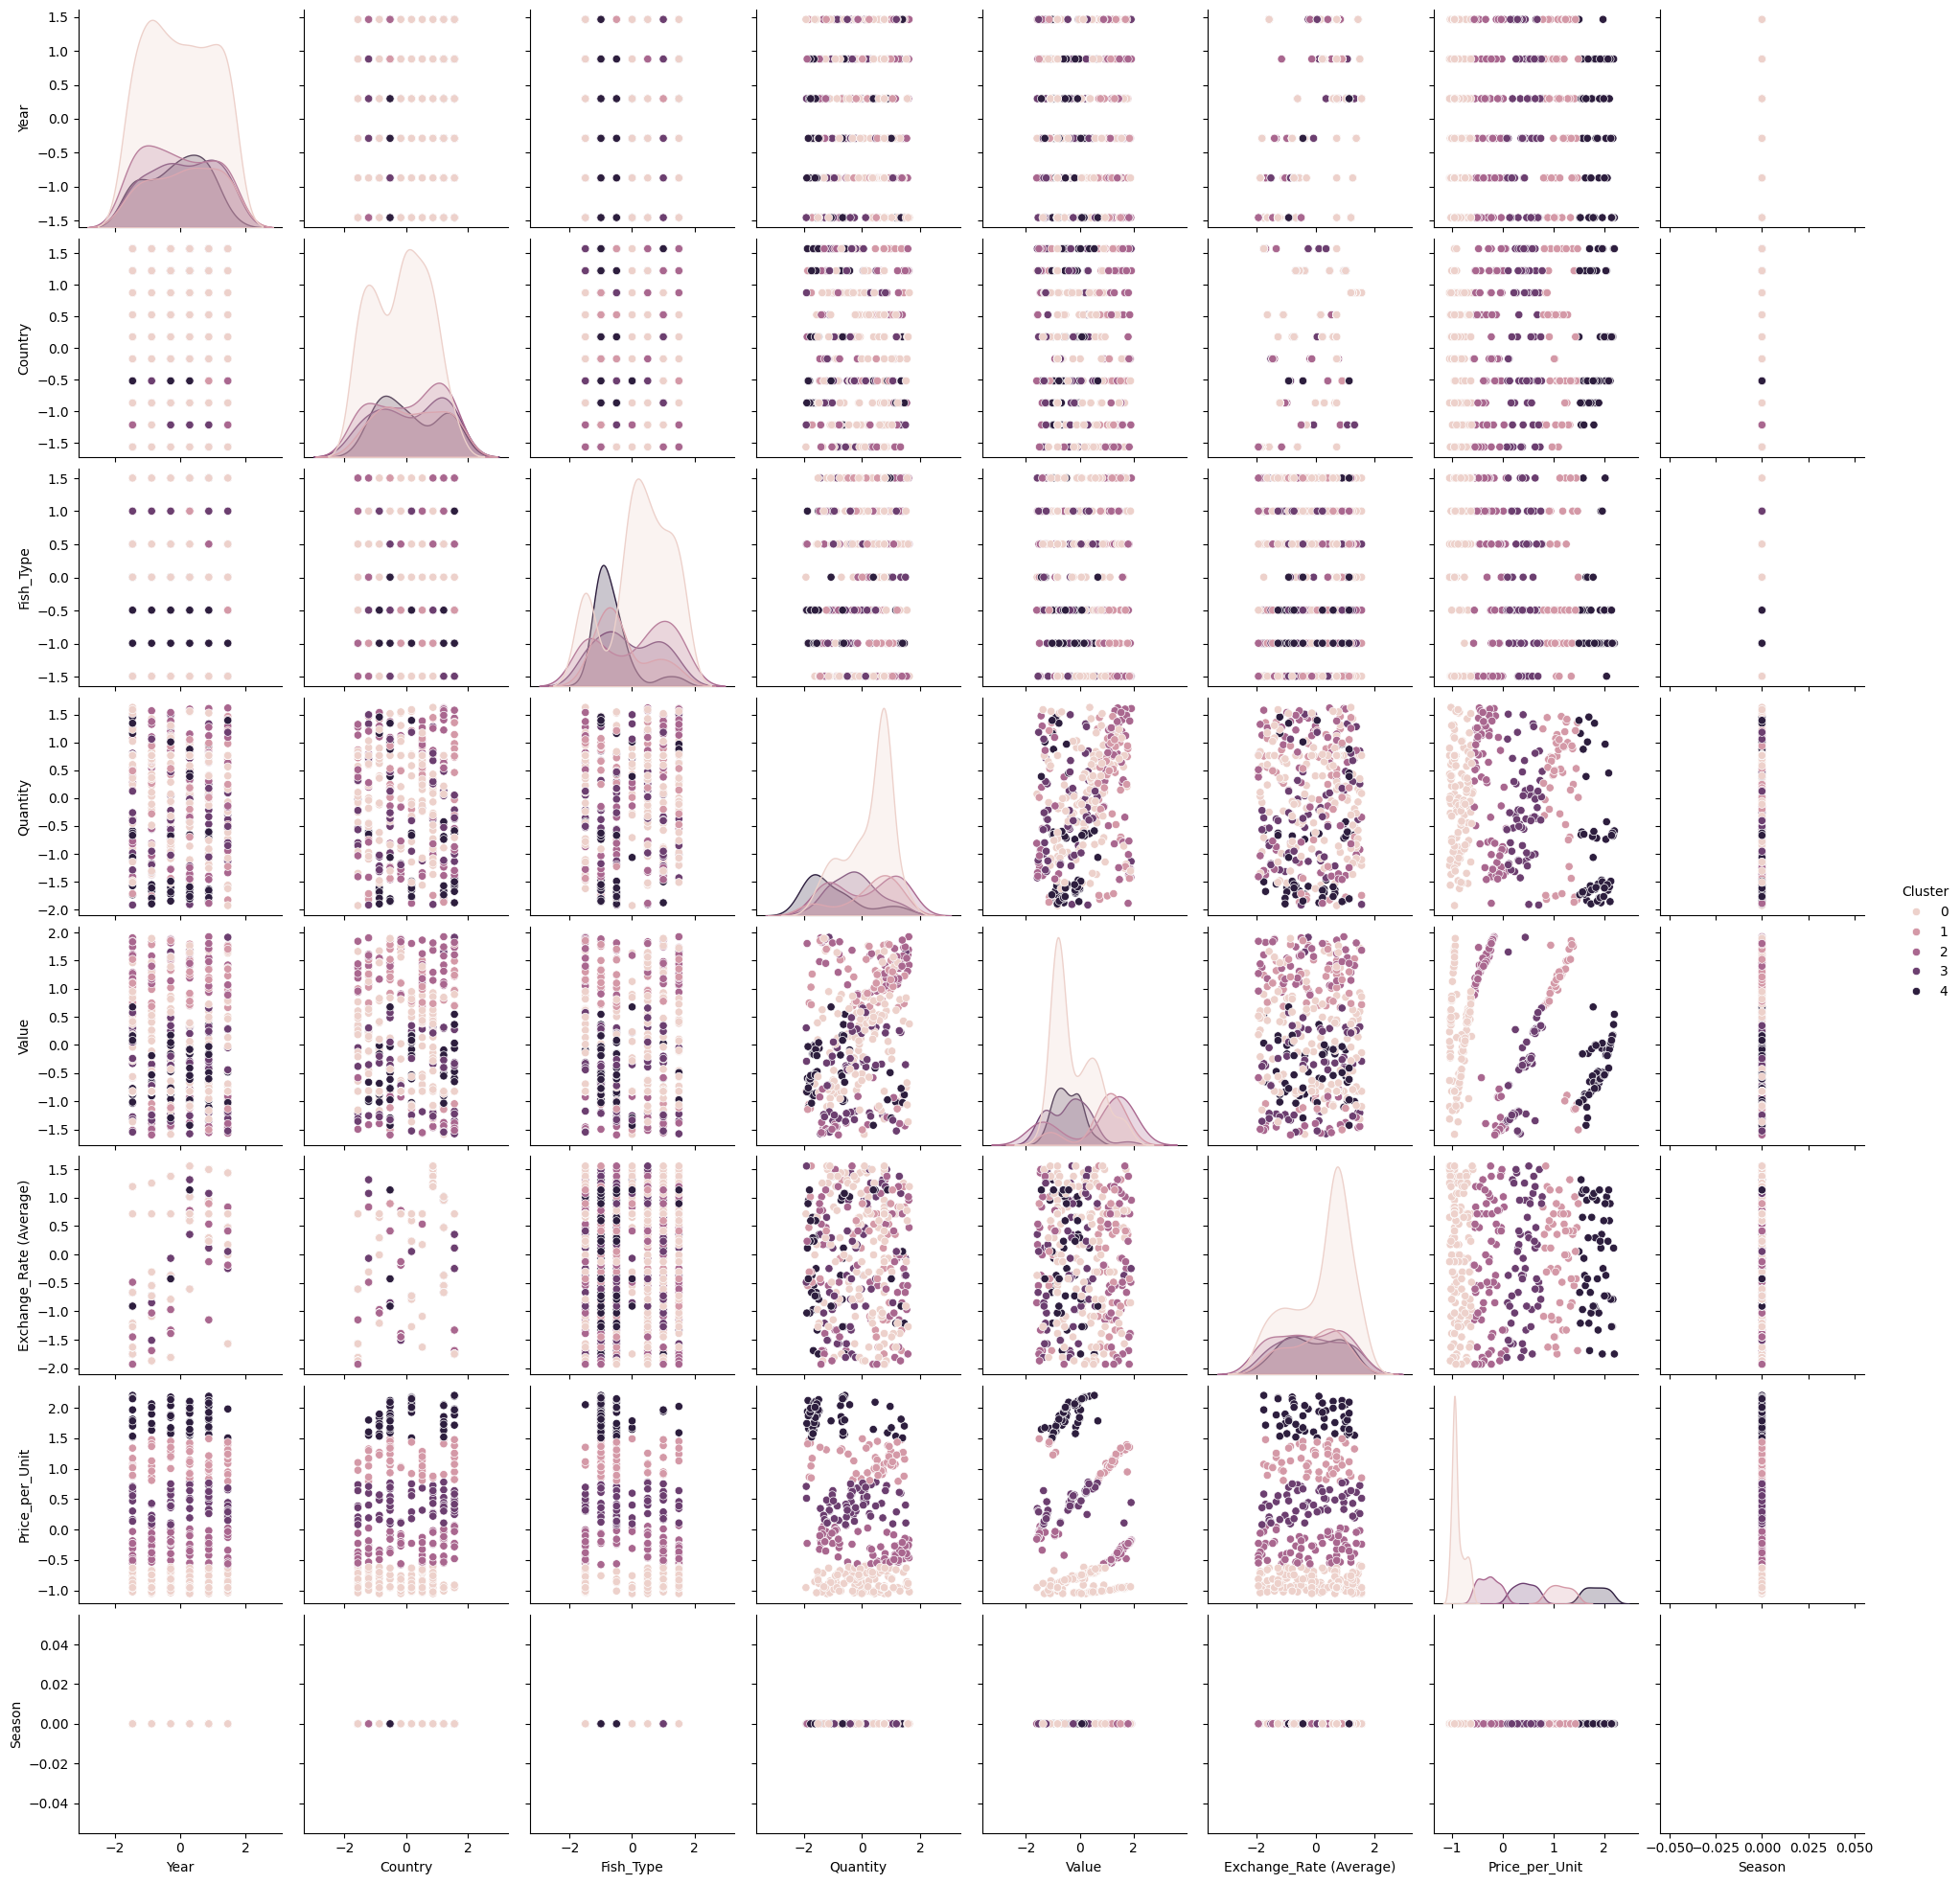

In [32]:
# Visualize Clustering Results
sns.pairplot(df_imputed, hue='Cluster')
plt.show()

 Visualization of Results

In [41]:
# Step 9: Train a Random Forest Regressor (instead of Classifier)
from sklearn.ensemble import RandomForestRegressor # Import Regressor instead of Classifier

model = RandomForestRegressor(random_state=42) # Change model to Regressor
model.fit(X_train, y_train)

# Evaluate the model
# For regression, use a metric like R-squared instead of accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print(f'Model R-squared: {r2}')

Model R-squared: 0.9923800524120292


Feature Importance
Visualize the importance of each feature in the model.

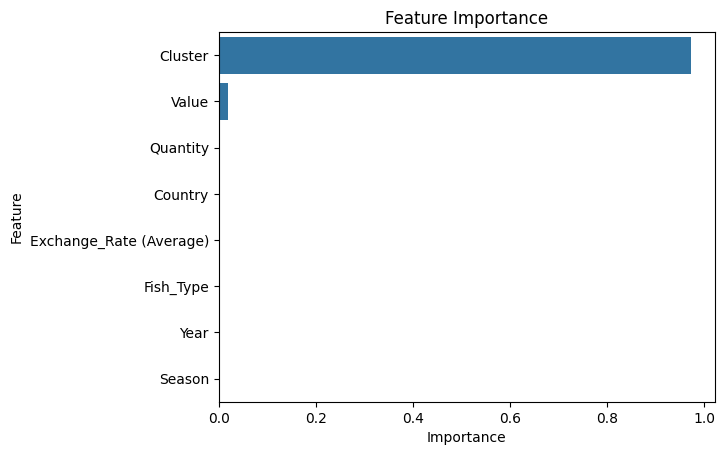

In [42]:
# Step 10: Visualize Feature Importance
importances = model.feature_importances_
feature_names = X.columns # Use X.columns instead of df_imputed.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

Index(['Year', 'Country', 'Fish_Type', 'Quantity', 'Value',
       'Exchange_Rate (Average)', 'Price_per_Unit', 'Season', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')


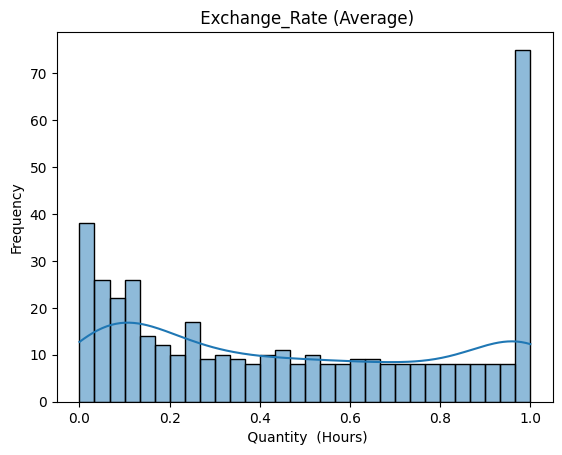

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)
column_name = 'Price_per_Unit'

sns.histplot(df[column_name], bins=30, kde=True)
plt.title(' Exchange_Rate (Average)')
plt.xlabel(' Quantity  (Hours)')
plt.ylabel('Frequency')
plt.show()


In [44]:
# Visualize the distribution of key variables
sns.countplot(x='', data=df)
plt.title('')
plt.show()

sns.countplot(x='', data=df)
plt.title('')
plt.show()

sns.countplot(x='', data=df)
plt.title('')
plt.show()

imputedData = df  # Rename df to imputedData
sns.displot(imputedData[""])

ValueError: Could not interpret value `` for `x`. An entry with this name does not appear in `data`.

Index(['Year', 'Country', 'Fish_Type', 'Quantity', 'Value',
       'Exchange_Rate (Average)', 'Price_per_Unit', 'Season', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')


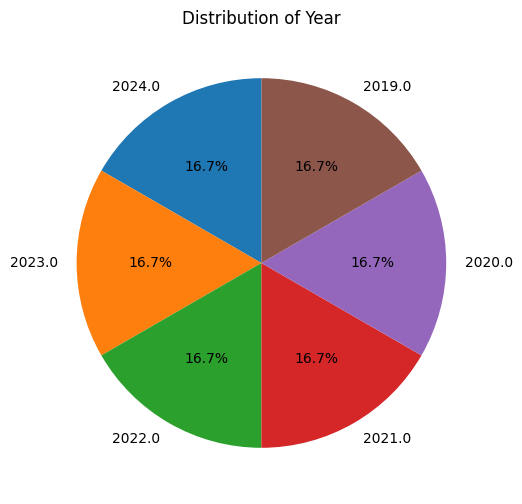

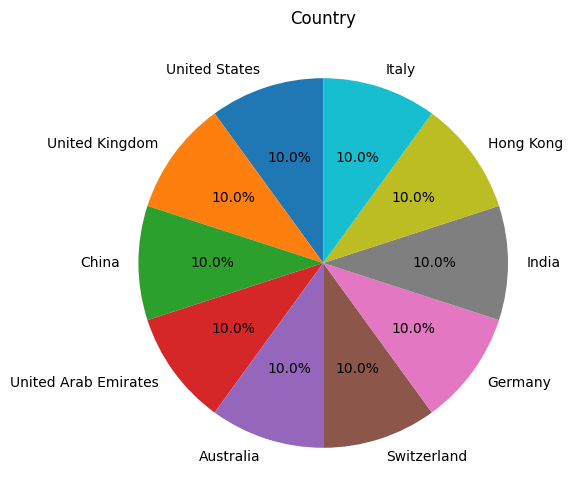

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into the imputedData variable
file_path = '/content/Structure1.csv'
df = pd.read_csv(file_path, encoding='latin-1')


imputedData = df

# Print the actual column names to inspect them
print(imputedData.columns)

# Access columns using their actual names
plt.figure(figsize=(6, 6))
plt.pie(imputedData['Year'].value_counts(),
        labels=imputedData['Year'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Year')  # Update the title accordingly
plt.show()


import matplotlib.pyplot as plt
import pandas as pd

# Repeat for other categorical columns as needed
# For example:
plt.figure(figsize=(6, 6))

# Access the column using its actual name from the DataFrame
plt.pie(imputedData['Country'].value_counts(),
        labels=imputedData['Country'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)

# Update the title to reflect the actual column name
plt.title('Country')
plt.show()

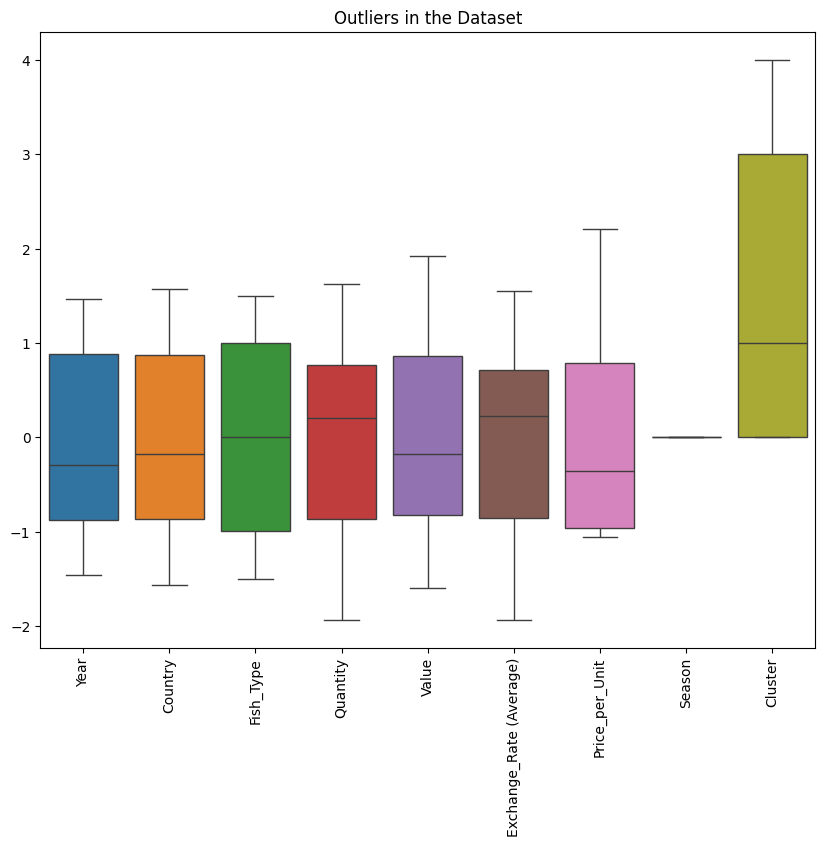

In [50]:

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_imputed)
plt.xticks(rotation=90)
plt.title("Outliers in the Dataset")
plt.show()

Save the Cleaned Data Save the cleaned dataset for future reference.

In [52]:
# Step 11: Save the cleaned dataset
df_imputed.to_csv('/content/Structure1.csv', index=False)
print("Cleaned data saved to 'Structure1.csv'.")

Cleaned data saved to 'Structure1.csv'.
